In [12]:
import numpy as np
import dataP2 
import regressor
file_path = "CCPP/CCPP/Folds5x2_pp.xlsx"
data = dataP2.readData(file_path)                         
test_set = data[0:1000]                                               
training = data[1000:]
n = 5                              # 5 cross fold validation
M = 8                              # Polynomial  maximum degree
tr_rms = np.zeros(M-1)               # training Erms
te_rms  = np.zeros(M-1)              # testing error root mean square
val_rms = np.zeros(M-1)              # validation error root mean square
val_std = np.zeros(M-1)          # validation Erms standard deviation



In [13]:
for m in range(1,M):
    valid_rms = np.zeros(n)               
    train_rms = np.zeros(n)
    Weights   = np.zeros((m+1,n))        
    
    for i in range(n):
        train_set, valid_set = dataP2.crossfold(training,n,i)   
       
        Xtr = dataP2.getColumn(train_set, ['V'])
        Ytr = dataP2.getColumn(train_set, ['PE'])            
        Xval = dataP2.getColumn(valid_set, ['V'])             
        Yval = dataP2.getColumn(valid_set, ['PE'])      
    
        W1 = regressor.poly_fit(Xtr, Ytr, m)                    
        Weights[:, i] = W1.reshape(W1.shape[0])          
        
        
        yval_predicted = regressor.predict(Xval, W1, m)        
        valid_rms[i]   = regressor.error_rms(Yval , yval_predicted.reshape(Yval.shape))  
    
        
        ytrain_predicted = regressor.predict(Xtr, W1,m)       
        train_rms[i]     = regressor.error_rms(Ytr, ytrain_predicted.reshape(Ytr.shape))   
            
    val_rms[m-1]  = np.mean(valid_rms)                  
    val_std[m-1]   = np.std (valid_rms)              
    tr_rms[m-1] = np.mean(train_rms)                   
    
    
    min_indx    = np.argsort(valid_rms)[0]             
    
    W = Weights[:, min_indx]                           
    
    Xtest = dataP2.getColumn(test_set, ['V'])              
    Ytest = dataP2.getColumn(test_set, ['PE'])             
    
    ytest_predicted = regressor.predict(Xtest, W,m)
    te_rms[m-1]      = regressor.error_rms(Ytest, ytest_predicted.reshape(Ytest.shape))   


validtion Erms============  [8.43116075 8.1212967  8.12181401 8.02837726 7.88129243 7.86855079
 7.77458984]
Training Erms=============  [8.43788852 8.12219975 8.11665296 8.02362934 7.8784024  7.86401501
 7.76934422]
Testing Erms==============  [8.28687516 7.88474996 7.90781129 7.89631774 7.73106768 7.72269677
 7.5668455 ]


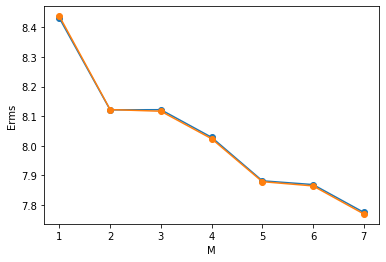

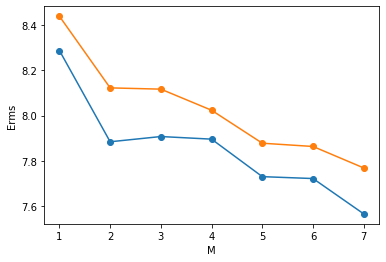

the best polynomial Degree with the lowest validaiton Erms :  7


In [14]:
print("validtion Erms============ " ,val_rms)
print("Training Erms============= " , tr_rms)
print("Testing Erms============== ", te_rms)

dataP2.plotrms(val_rms, tr_rms, 0)
dataP2.plotrms(te_rms, tr_rms,1)

min_validrms = np.argsort(val_rms)[0]
print("the best polynomial Degree with the lowest validaiton Erms : " , min_validrms+1)


<ErrorbarContainer object of 3 artists>

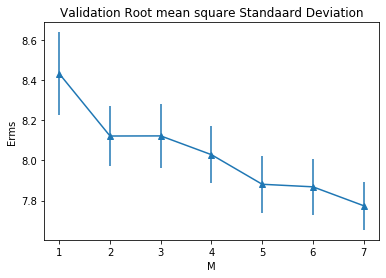

In [15]:
import matplotlib.pyplot as plt 

plt.title("Validation Root mean square Standaard Deviation")
plt.xlabel("M")
plt.ylabel("Erms")
x  = range(1,len(val_rms)+1)
plt.errorbar(x, val_rms, val_std, marker='^')


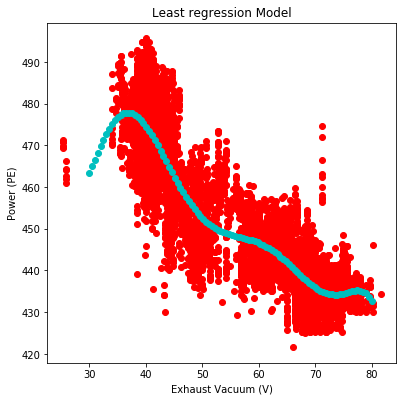

In [17]:
W_7= regressor.poly_fit(Xtr, Ytr, 7)
W_7 = np.append( W_7[-1], W_7[:len(W_7)-1])
plt.figure(figsize=(2*3.13,2*3.13))
plt.title("Least regression Model")
plt.xlabel("Exhaust Vacuum (V)")
plt.ylabel("Power (PE)")
plt.plot(Xtr[:, 0], Ytr[:, 0], 'ro')
x= np.linspace(30, 80, 100)
y= W_7[0]
for i in range (1, len(W_7)):
    y = y + (W_7[i] *x**(i))
plt.plot(x,y,'co')
plt.show()


### 